# Question 1 : (22 total points) Linear Regression
In this question we will fit linear regression models to data.
Here we will investigate the relationship between the amount of time (in hours) each
student in a class studied for an exam and their end of semester exam performance. We
will model this relationship for each student using $y_i = φ(x_i)w$, where $φ(x_i) = [1, x_i]$ is a
row vector and w are the model parameters we will learn. Here, yi
is the exam score for
student i and xi
is the amount of time they spent revising.
The dataset is contained in regression_part1.csv. You should load it into a Pandas
DataFrame using pandas.read_csv().

In [1]:
# Import packages
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
%matplotlib inline

/Users/davemalvin/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence
/Users/davemalvin/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# Load the dataset
data_path = os.path.join(os.getcwd(), 'data', 'regression_part1.csv')
dset = pd.read_csv(data_path, delimiter = ',')

# (a) (3 points) Describe the main properties of the data, focusing on the size, data ranges, and data types.

In [3]:
dset.describe()

,revision_time,exam_score
count,50.000000,50.000000
mean,22.220020,49.919860
std,13.986112,20.925594
min,2.723000,14.731000
25%,8.570500,32.125000
50%,21.688000,47.830500
75%,32.257500,65.069750
max,48.011000,94.945000


In [4]:
dset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
revision_time    50 non-null float64
exam_score       50 non-null float64
dtypes: float64(2)
memory usage: 880.0 bytes


In [5]:
dset.head()

,revision_time,exam_score
0,2.723,27.682
1,2.844,22.998
2,3.303,19.765
3,3.588,24.481
4,4.050,22.974


# (b) (3 points) Fit a linear model to the data so that we can predict exam_score from revision_time. Report the estimated model parameters w. Describe what the parameters represent for this 1D data. For this part, you should use the sklearn implementation of Linear Regression.
Hint: By default in sklearn fit_intercept = True. Instead, set `fit_intercept = False` and pre-pend 1 to each value of $x_i$ yourself to create $φ(x_i) = [1, x_i]$.

In [6]:
rows = dset.shape[0]
dset = np.concatenate((np.ones((rows,1)), dset), axis=1)

In [7]:
dset[:5]

array([[ 1.   ,  2.723, 27.682],
       [ 1.   ,  2.844, 22.998],
       [ 1.   ,  3.303, 19.765],
       [ 1.   ,  3.588, 24.481],
       [ 1.   ,  4.05 , 22.974]])

In [8]:
# Assign first two columns of dset as X and last column as y
X = dset[:,:-1]
y = dset[:,-1]
print(X[:5])
print(y[:5])

[[1.    2.723]
 [1.    2.844]
 [1.    3.303]
 [1.    3.588]
 [1.    4.05 ]]
[27.682 22.998 19.765 24.481 22.974]


In [9]:
lr = LinearRegression(fit_intercept=False)
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [10]:
# This is the model parameter w
lr.coef_

array([17.89768026,  1.44114091])

In [11]:
lr.intercept_

0.0

# (c) (3 points) Display the fitted linear model and the input data on the same plot.

In [12]:
def plot_regression_line(lr,min_X, max_X):  
    x = np.array(range(min_X, max_X))  
    y = x * lr.coef_[1] + lr.coef_[0]
    plt.plot(x, y)

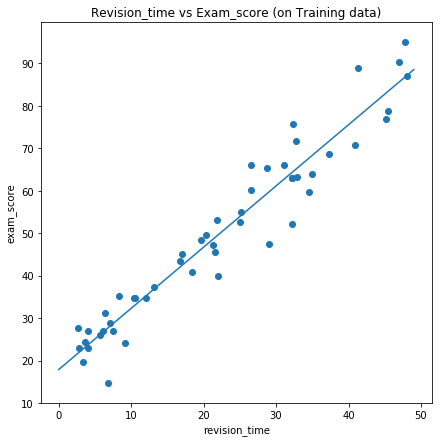

In [13]:
plt.figure(figsize=(7,7))

plot_regression_line(lr,0,50)

# Remove the column of 1s
input_X = X[:,1:]
plt.scatter(input_X,y)

plt.xlabel('revision_time')
plt.ylabel('exam_score')
plt.title('Revision_time vs Exam_score (on Training data)')
plt.show()

# (d) (3 points) Instead of using sklearn, implement the closed-form solution for fitting a linear regression model yourself using numpy array operations. Report your code in the answer box. It should only take a few lines (i.e. <5).
Hint: Only report the relevant lines for estimating w e.g. we do not need to see the data
loading code. You can write the code in the answer box directly or paste in an image of
it.

In [14]:
pseudoInverse = np.linalg.inv((X.T).dot(X)).dot(X.T)
w = pseudoInverse.dot(y)
y_preds_cf = X.dot(w)

print("Model parameters: {}".format(w))
y_preds_cf

Model parameters: [17.89768026  1.44114091]


array([21.82190694, 21.99628499, 22.65776867, 23.06849383, 23.73430093,
       23.77753515, 26.07471376, 26.63099415, 27.04460159, 27.72482009,
       28.12689841, 28.72785416, 29.93985366, 31.17635256, 32.8336646 ,
       33.04407117, 35.3383675 , 36.90200538, 41.95320425, 42.36392941,
       44.31379306, 46.14260086, 47.1831046 , 48.56515873, 48.99461872,
       49.31166972, 49.67195494, 53.85270471, 54.13805061, 56.08070855,
       56.13835418, 59.23968941, 59.77002927, 62.63501739, 64.26783003,
       64.30674084, 64.33988708, 64.400415  , 65.03884042, 65.29104007,
       67.60118895, 68.17764531, 71.65079489, 76.80431477, 77.34330147,
       83.05598402, 83.32115394, 85.52033496, 86.81015607, 87.08829627])

# (f) (3 points) Our next step will be to evaluate the performance of the fitted models using Mean Squared Error (MSE). 
Report the MSE of the data in regression_part1.csv for your prediction of exam_score. You should report the MSE for the linear model fitted using sklearn and the model resulting from your closed-form solution. Comment on any differences in their performance.

In [15]:
# MSE for the linear model fittend using sklearn (calculated using actual output and predicted output)
y_preds_sklearn = lr.predict(X) # predicted output
mse_sklearn = mean_squared_error(y, y_preds_sklearn)

# MSE for the linear model fittend using closed-form solution
mse_np = mean_squared_error(y, y_preds_cf)

print("MSE for linear model using sklearn: {}".format(mse_sklearn))
print("MSE for linear model using closed-form solution: {}".format(mse_np))

MSE for linear model using sklearn: 30.985472614541294
MSE for linear model using closed-form solution: 30.98547261454129


# (g) (4 points) Assume that the optimal value of w0 is 20, it is not but let's assume so for now. Create a plot where you vary w1 from −2 to +2 on the horizontal axis, and report the Mean Squared Error on the vertical axis for each setting of $w = [w_0, w_1]$ across the dataset. Describe the resulting plot. Where is its minimum? Is this value to be expected?
Hint: You can try 100 values of $w_1$ i.e. $w_1 = np.linspace(-2,2, 100)$

The minimum is when w1 is equal to 1.3535353535353538


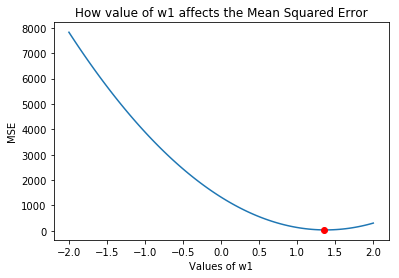

In [16]:
# Generate 100 values of w1
w1 = np.linspace(-2, 2, 100)
mse = []
# Loop through each value of w1 and use it to calculate predicted output and hence the MSE
for w_1 in w1:
    w_edited = [20, w_1] 
    y_preds_edited = X.dot(w_edited) # Predicted output with the edited model paramater w
    error = mean_squared_error(y, y_preds_edited)
    mse.append(error)

idxOfMinValue_Y = mse.index(min(mse))
minValue_X = w1[idxOfMinValue_Y]
print("The minimum is when w1 is equal to {}".format(minValue_X))

plt.plot(w1, mse)
plt.plot(minValue_X, min(mse), 'ro')
#plt.annotate("(1.3535353535353538, 32.48096161535148)", (1.3535353535353538, 32.48096161535148))
plt.xlabel('Values of w1')
plt.ylabel('MSE')
plt.title('How value of w1 affects the Mean Squared Error')
plt.show()

# Question 2 : (18 total points) Nonlinear Regression
In this question we will tackle regression using basis functions.
Here we will look at a regression dataset where the attribute we want to predict (output) does not have a linear relationship with the input attribute (input) we can measure. To overcome this problem we will first use polynomial basis functions, where again $y_i = φ(x_i)w$. However, now the row vector $φ(x_i) = [1, x_i, x_i^2 , ..., x_i^M ]$, where M is an integer. The dataset is contained in regression_part2.csv. You should load it into a Pandas DataFrame using pandas.read_csv().

In [17]:
# Load the dataset
data_path = os.path.join(os.getcwd(), 'data', 'regression_part2.csv')
dset2 = pd.read_csv(data_path, delimiter = ',')

In [18]:
dset2.head()

,input,output
0,2.728,9.088
1,3.244,12.786
2,-4.164,-10.016
3,4.875,32.976
4,3.329,10.437


In [19]:
dset2.describe()

,input,output
count,25.000000,25.00000
mean,0.817480,5.90728
std,3.277051,12.43568
min,-4.826000,-15.57700
25%,-2.588000,-1.46500
50%,2.633000,6.92900
75%,3.276000,11.38200
max,4.875000,32.97600


# (a) (5 points) Fit four different polynomial regression models to the data by varying the degree of polynomial features used i.e. M = 1 to 4. For example, M = 3 means that φ(xi) = [1, xi, xi2 , xi3 ]. Plot the resulting models on the same plot and also include the input data.
Hint: You can again use the sklearn implementation of Linear Regression and you can also use PolynomialFeatures to generate the polynomial features. Again, set fit_intercept = False.

In [20]:
# Assign columns from the dataset appropriately as input variables (X) and actual output (y)
X = dset2.iloc[:,:-1].values
y = dset2.iloc[:,-1].values
print(X[:5])
print(y[:5])

[[ 2.728]
 [ 3.244]
 [-4.164]
 [ 4.875]
 [ 3.329]]
[  9.088  12.786 -10.016  32.976  10.437]


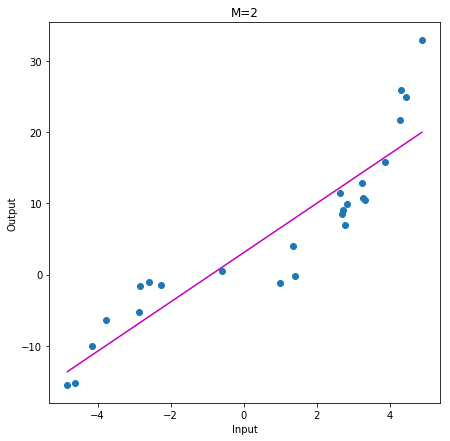

In [21]:
import operator

# transforms the existing features to higher degree features.
poly = PolynomialFeatures(degree=1)
X_poly = poly.fit_transform(X)

# fit the transformed features to Linear Regression
model = LinearRegression(fit_intercept=False)
model.fit(X_poly, y)

# predicting on training data-set
y_pred_poly = model.predict(X_poly)

# Sort transformed features and their corresponding output
zipped = zip(X,y_pred_poly)
sorted_zip = sorted(zipped, key=operator.itemgetter(0)) 
X_sorted, y_poly_sorted = zip(*sorted_zip) # Unzip

plt.figure(figsize=(7,7))
plt.scatter(X,y)
plt.plot(X_sorted, y_poly_sorted, color='m')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('M=2')
plt.show()

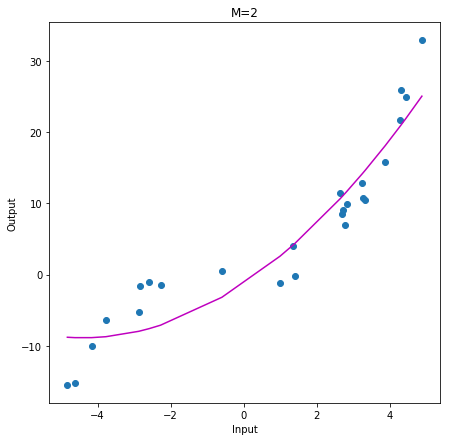

In [22]:
import operator

# transforms the existing features to higher degree features.
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# fit the transformed features to Linear Regression
model = LinearRegression(fit_intercept=False)
model.fit(X_poly, y)

# predicting on training data-set
y_pred_poly = model.predict(X_poly)

# Sort transformed features and their corresponding output
zipped = zip(X,y_pred_poly)
sorted_zip = sorted(zipped, key=operator.itemgetter(0)) 
X_sorted, y_poly_sorted = zip(*sorted_zip) # Unzip

plt.figure(figsize=(7,7))
plt.scatter(X,y)
plt.plot(X_sorted, y_poly_sorted, color='m')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('M=2')
plt.show()

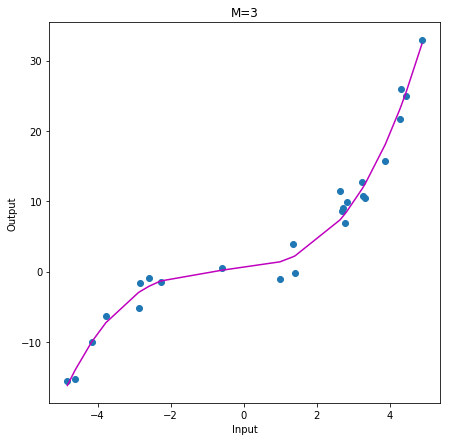

In [23]:
import operator

# transforms the existing features to higher degree features.
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# fit the transformed features to Linear Regression
model = LinearRegression(fit_intercept=False)
model.fit(X_poly, y)

# predicting on training data-set
y_pred_poly = model.predict(X_poly)

# Sort transformed features and their corresponding output
zipped = zip(X,y_pred_poly)
sorted_zip = sorted(zipped, key=operator.itemgetter(0)) 
X_sorted, y_poly_sorted = zip(*sorted_zip) # Unzip

plt.figure(figsize=(7,7))
plt.scatter(X,y)
plt.plot(X_sorted, y_poly_sorted, color='m')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('M=3')
plt.show()

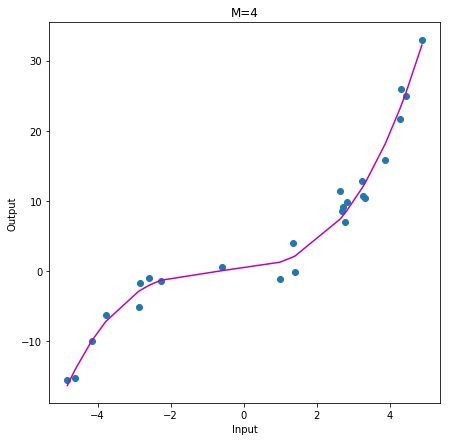

In [24]:
import operator

# transforms the existing features to higher degree features.
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

# fit the transformed features to Linear Regression
model = LinearRegression(fit_intercept=False)
model.fit(X_poly, y)

# predicting on training data-set
y_pred_poly = model.predict(X_poly)

# Sort transformed features and their corresponding output
zipped = zip(X,y_pred_poly)
sorted_zip = sorted(zipped, key=operator.itemgetter(0)) 
X_sorted, y_poly_sorted = zip(*sorted_zip) # Unzip

plt.figure(figsize=(7,7))
plt.scatter(X,y)
plt.plot(X_sorted, y_poly_sorted, color='m')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('M=4')
plt.show()

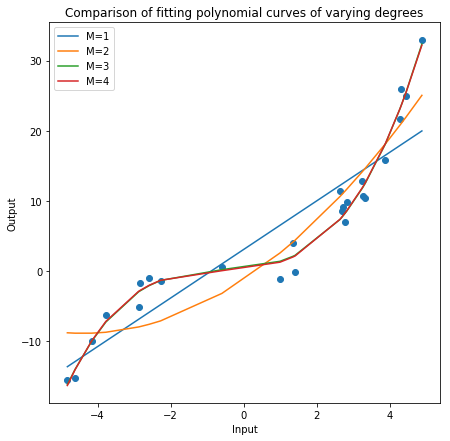

In [25]:
import operator

def Poly_Regression(degree):
    # transforms the existing features to higher degree features.
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    # fit the transformed features to Linear Regression
    model = LinearRegression(fit_intercept=False)
    model.fit(X_poly, y)

    # predicting on training data-set
    y_pred_poly = model.predict(X_poly)

    # Sort transformed features and their corresponding output
    zipped = zip(X,y_pred_poly)
    sorted_zip = sorted(zipped, key=operator.itemgetter(0)) 
    X_sorted, y_poly_sorted = zip(*sorted_zip) # Unzip
    
    return X_sorted, y_poly_sorted

#     plt.figure(figsize=(7,7))
#     plt.scatter(X2,y2)
#     plt.plot(X2_sorted, y_poly_sorted, color='m')
    
ListX = []
ListY = []
for deg in [1,2,3,4]:
    curr_X,curr_y = Poly_Regression(deg)
    ListX.append(curr_X)
    ListY.append(curr_y)
    
plt.figure(figsize=(7,7))
plt.scatter(X,y)
for i in range(4):
    plt.plot(ListX[i], ListY[i])
plt.legend(['M=1', 'M=2', 'M=3', 'M=4'], loc='upper left')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Comparison of fitting polynomial curves of varying degrees')
plt.show()

# (b) (3 points) Create a bar plot where you display the Mean Squared Error of each of the four different polynomial regression models from the previous question.

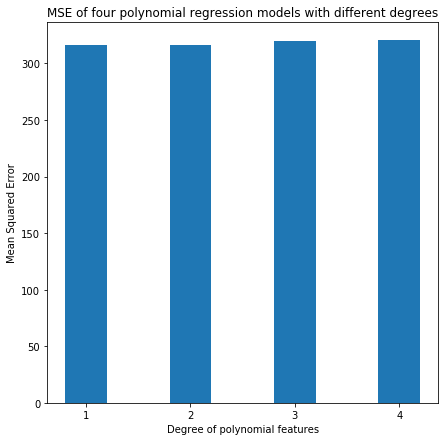

In [27]:
plt.figure(figsize=(7,7))
ListMSE = []
for y_pred in ListY:
    err = mean_squared_error(y,y_pred)
    ListMSE.append(err)
plt.bar(['1','2','3','4'], ListMSE, width=0.4)
plt.xlabel("Degree of polynomial features") 
plt.ylabel("Mean Squared Error") 
plt.title("MSE of four polynomial regression models with different degrees") 
plt.show() 

# (d) (6 points) Instead of using polynomial basis functions, in this final part we will use another type of basis function - radial basis functions (RBF). 
Specifically, we will define $φ(x_i) = [1,rbf(x_i;c_1,α),rbf(x_i;c_2,α),rbf(x_i;c_3,α),rbf(x_i;c_4,α)]$, where $rbf(x;c,α) = exp(−0.5(x − c)^2/α^2)$ is an RBF kernel with center c and width α. Note that in this example, we are using the same width α for each RBF, but different centers for each. Let `c1 = −4.0`, `c2 = −2.0`, `c3 = 2.0`, and `c4 = 4.0` and plot the resulting nonlinear predictions using the regression_part2.csv dataset for `α ∈ {0.2, 100, 1000}`. You can plot all three results on the same figure. Comment on the impact of larger or smaller values of α.

In [29]:
def rbf(x,c,a):
    res = exp(-(0.5(x-c)^2)/a)
    return res

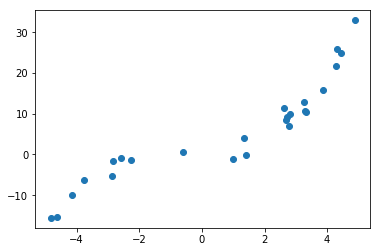

In [28]:
centers = [-4.0, -2.0, 2.0, 4.0]
widths = [0.2, 100, 1000]
